# Kelompok 9

Nama Anggota Kelompok :
1. Adjie Tresnohadi Dermawan
2. Baginda Habiburohman
3. Moses Johanes Febrian Manuputty 

----

## 1. Perkenalan

### 1.1 Latar Belakang
pada Projek kali ini akan melakukan pengujian memuat dataset prediksi hujan di negara Australia.projek ini akan membuat sebuah klasifikasi dimana akan memprediksikan hujan atau tidak pada negara tersebut dengan menggunakan model logistic regression dan SVM

### 1.2 Objective yang ingin dicapai
1. Mampu memahami konsep classification dengan Logistic Regression dan SVM
2. Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
3. Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

## 2. Import Pustaka yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

## 3. Data Loading

### 3.1 Import Data

In [2]:
data = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### 3.2 Cek isi data

In [5]:
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
# Mengubah dtype pada kolom Date menjadi datetime
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [9]:
# Cek missing value pada kolom
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## 4. Data Cleaning

### 4.1 Menghilangkan Missing Value

In [10]:
# Menghilangkan missing value pada data
data = data.dropna()

In [11]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [12]:
data.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [13]:
data.shape

(56420, 23)

### 4.2 Mengubah kolom Date untuk mengambil nilai tahun dan bulan

In [14]:
data['Year'] = data['Date'].dt.year
data['Month']= data['Date'].dt.month

In [15]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,2017,6
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,2017,6
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,2017,6
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,2017,6


In [16]:
# Menghilangkan kolom Date
data = data.drop(columns='Date') 
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,2009,1
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2009,1
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,2009,1
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,2009,1
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,2017,6
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,2017,6
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,2017,6
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,2017,6


## 5. Data Exploration

### 5.1 Intensitas curah hujan tiap wilayah

In [17]:
rainfalloc = data[['Rainfall', 'Location']].groupby(['Location'], as_index=False).agg({'Rainfall':'mean'})

In [18]:
rainfalloc

,Location,Rainfall
0,AliceSprings,0.955556
1,Brisbane,2.855401
2,Cairns,4.522259
3,Canberra,1.906957
4,Cobar,1.182397
5,CoffsHarbour,3.885942
6,Darwin,4.038210
7,Hobart,1.624033
8,Melbourne,1.912118
9,MelbourneAirport,1.455787


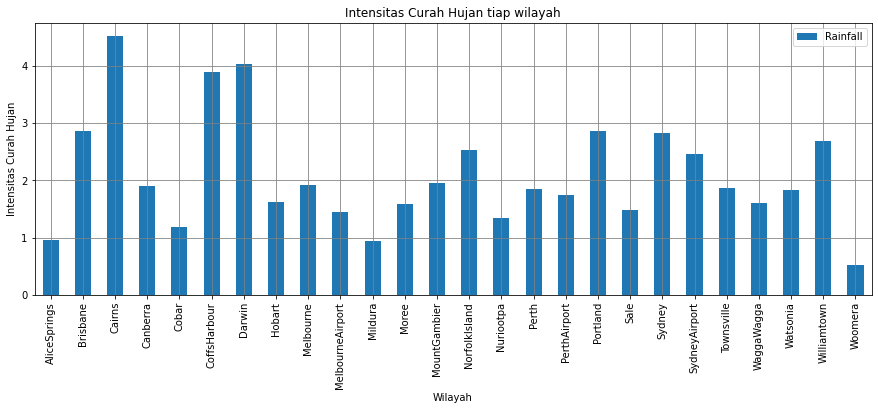

In [19]:
rainfalloc.plot(kind='bar', x='Location', y='Rainfall', figsize=(15,5))

plt.title('Intensitas Curah Hujan tiap wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Intensitas Curah Hujan')
plt.grid(color="grey")

plt.show()

Pada plot ini disimpulkan bahwa untuk :
1. intensitas curah hujan tertinggi terdapat di wilayah Cairns dengan nilai rata-rata 4.5 dan,
2. intensitas curah hujan terendah terdapat di wilayah Woomera dengan nilai rata-rata 0.52

### 5.2 Kecepatan angin tiap bulan

In [20]:
windspeedmonth = data[['WindGustSpeed', 'Month']].groupby(['Month'], as_index=False).agg({'WindGustSpeed':'mean'})

In [21]:
windspeedmonth

,Month,WindGustSpeed
0,1,44.097399
1,2,42.126035
2,3,40.339196
3,4,37.421303
4,5,37.237745
5,6,37.006353
6,7,39.224464
7,8,41.414340
8,9,42.732428
9,10,42.941176


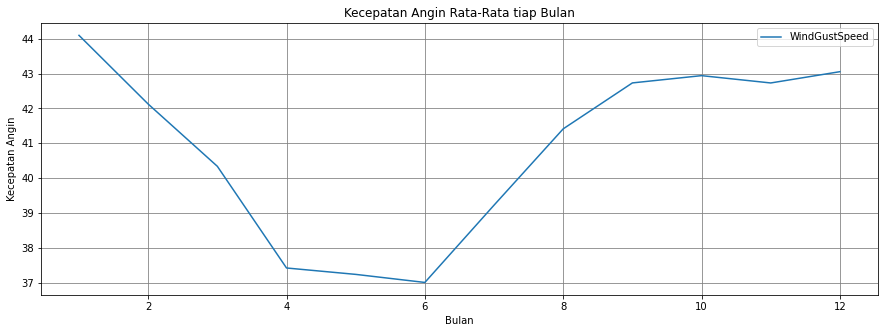

In [22]:
windspeedmonth.plot(kind='line', x='Month', y='WindGustSpeed', figsize=(15,5))

plt.title('Kecepatan Angin Rata-Rata tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kecepatan Angin')
plt.grid(color="grey")

plt.show()

Disimpulkan untuk plot ini bahwa dari bulan pertama hingga bulan ke enam kecepatan angin menurun dan akan meningkat kembali dari bulan ke enam hingga bulan ke dua belas

### 5.3 Kecepatan angin tiap tahun

In [23]:
windspeedyear = data[['WindGustSpeed','Year']].groupby(['Year'], as_index=False).agg({'WindGustSpeed':'mean'})

In [24]:
windspeedyear

,Year,WindGustSpeed
0,2007,40.918033
1,2008,41.761941
2,2009,41.996982
3,2010,40.098647
4,2011,40.406182
5,2012,40.814385
6,2013,41.425792
7,2014,40.850731
8,2015,40.883842
9,2016,41.086385


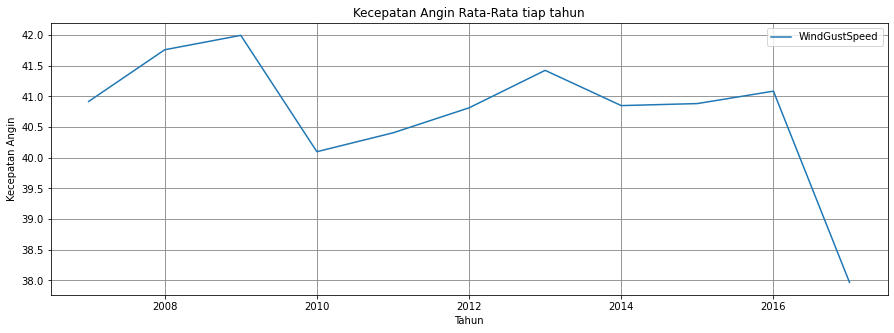

In [25]:
windspeedyear.plot(kind='line', x='Year', y='WindGustSpeed', figsize=(15,5))

plt.title('Kecepatan Angin Rata-Rata tiap tahun')
plt.xlabel('Tahun')
plt.ylabel('Kecepatan Angin')
plt.grid(color="grey")

plt.show()

Dapat disimpulkan bahwa untuk tiap tahun kecepatan angin semakin menurun seiring berjalannya tahun

### 5.4 Curah hujan tiap bulan

In [26]:
rainfallmonth = data[['Rainfall','Month']].groupby(['Month'], as_index=False).agg({'Rainfall':'mean'})

In [27]:
rainfallmonth

,Month,Rainfall
0,1,2.754224
1,2,2.962071
2,3,2.402319
3,4,2.011940
4,5,1.775429
5,6,2.302760
6,7,1.840348
7,8,1.754928
8,9,1.583980
9,10,1.590148


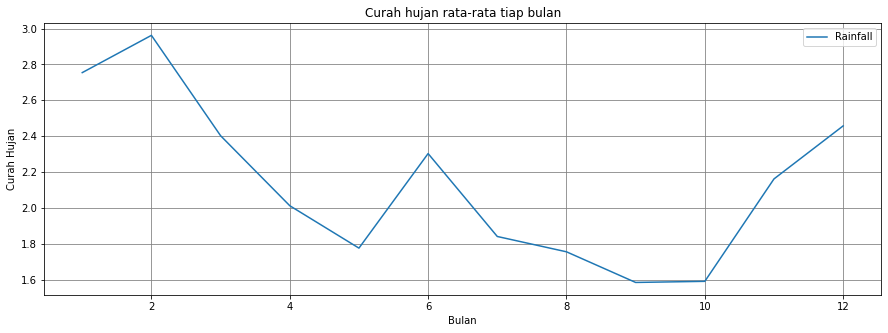

In [28]:
rainfallmonth.plot(kind='line', x='Month', y='Rainfall', figsize=(15,5))

plt.title('Curah hujan rata-rata tiap bulan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan')
plt.grid(color="grey")

plt.show()

Disimpulkan untuk curah hujan pada bulan pertama hingga bulan ke sepuluh mengalami penurunan curah hujan, dan meningkat dimulai dari bulan ke sepuluh hinggu bulan ke dua belas

### 5.5 Curah hujan tiap tahun

In [29]:
rainfallyear = data[['Rainfall','Year']].groupby(['Year'], as_index=False).agg({'Rainfall':'mean'})

In [30]:
rainfallyear

,Year,Rainfall
0,2007,3.219672
1,2008,2.080586
2,2009,1.874297
3,2010,2.549865
4,2011,2.644590
5,2012,1.961856
6,2013,2.012772
7,2014,1.837385
8,2015,1.932790
9,2016,2.082197


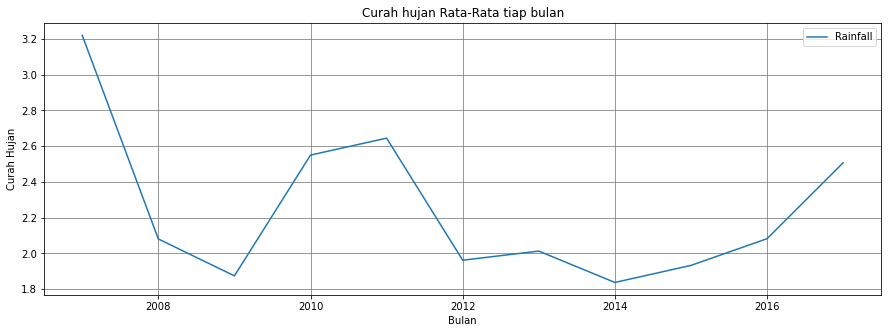

In [31]:
rainfallyear.plot(kind='line', x='Year', y='Rainfall', figsize=(15,5))

plt.title('Curah hujan Rata-Rata tiap bulan')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan')
plt.grid(color="grey")

plt.show()

Disimpulkan untuk plot ini bahwa dari tahun 2007 hingga 2009 sempat mengalami penurunan curah hujan. Di tahun berikutnya mengalami kenaikan curah hujan selama 2 tahun dan menurun kembali curah hujan hingga tahun 2014. Dari tahun 2014 curah hujan meningkat kembali hingga 2017

### 5.6 Kecepatan angin berdasarkan arah angin

Dalam data tersebut terdapat kolom WindGustDir yang berisikan data arah angin. dari sini kita melihat arah angin pada setiap wilayah di Australia memiliki beragam kecepatan. Dari sini kita akan menganalisis arah mata angin manakah yang memiliki kecepatan yang paling tinggi dan paling rendah berdasarkan semua wilayah yang ada di Australia.

In [32]:
winddirspeed = data[['WindGustSpeed','WindGustDir']].groupby(['WindGustDir'], as_index=False).agg({'WindGustSpeed':'mean'})

In [33]:
winddirspeed

,WindGustDir,WindGustSpeed
0,E,38.901019
1,ENE,35.996524
2,ESE,38.720411
3,N,45.033967
4,NE,36.421036
5,NNE,39.484499
6,NNW,41.685452
7,NW,44.578867
8,S,40.589384
9,SE,38.970483


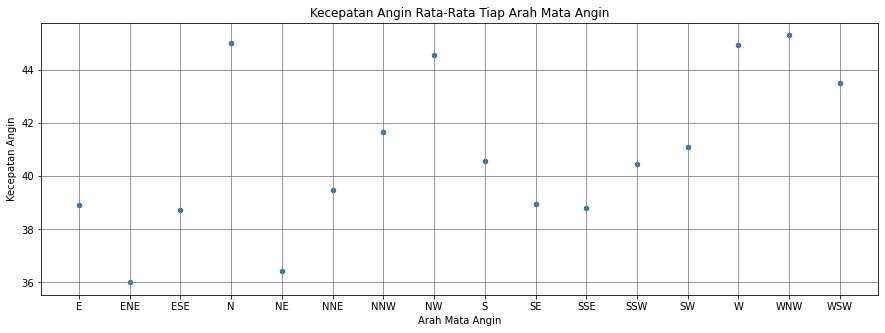

In [34]:
winddirspeed.plot(kind='scatter', x='WindGustDir', y='WindGustSpeed', figsize=(15,5))

plt.title('Kecepatan Angin Rata-Rata Tiap Arah Mata Angin')
plt.xlabel('Arah Mata Angin')
plt.ylabel('Kecepatan Angin')
plt.grid(color="grey")

plt.show()

Pada Plotting diatas dapat disimpulkan bahwa:
1. Kecepatan angin paling tinggi terdapat di arah WNW (West-Norwest)
2. Kecepatan angin paling rendah terdapat di arah ENE (East-Noreast)

### 5.7 Perbandingan suhu maksimal dan minimal di setiap wilayah Australia

In [35]:
LocTemp = data[['MaxTemp', 'MinTemp', 'Location']].groupby(['Location'],as_index=False).agg({'MinTemp':'mean','MaxTemp':'mean'})

In [36]:
LocTemp

,Location,MinTemp,MaxTemp
0,AliceSprings,13.878093,29.724921
1,Brisbane,16.365628,26.436810
2,Cairns,21.129296,29.551596
3,Canberra,7.727829,20.363822
4,Cobar,13.828090,26.225281
5,CoffsHarbour,14.485000,23.766304
6,Darwin,23.166492,32.559536
7,Hobart,8.957091,17.783961
8,Melbourne,11.672445,20.590253
9,MelbourneAirport,9.958313,20.494537


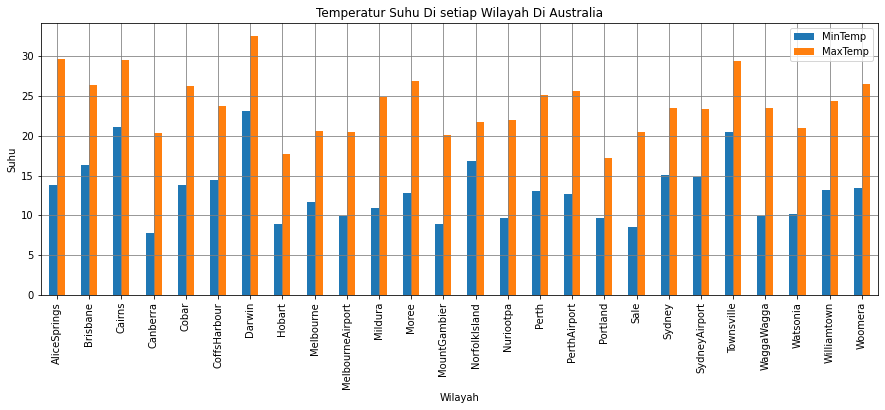

In [37]:
LocTemp.plot(kind='bar',x='Location', figsize=(15,5))

plt.title('Temperatur Suhu Di setiap Wilayah Di Australia')
plt.xlabel('Wilayah')
plt.ylabel('Suhu')
plt.grid(color="grey")

plt.show()

Pada Plotting ini disimpulkan bahwa:
1. suhu yang paling tinggi terdapat di wilayah Darwin dengan nilai suhu 32.5 derajat celcius dan,
2. suhu yang paling rendah terdapat di wilayah Canberra dengan nilai suhu 7 derajat celcius

### 5.8 Perkiraan cuaca hujan berdasarkan evaporation

In [38]:
evaporain = data[['Evaporation','RainToday','RainTomorrow']].groupby(['RainToday','RainTomorrow'], as_index=False).agg({'Evaporation':'mean'})

In [39]:
evaporain

,RainToday,RainTomorrow,Evaporation
0,No,No,6.073367
1,No,Yes,5.145796
2,Yes,No,4.011921
3,Yes,Yes,3.962668


berdasarkan Data diatas, disimpulkan bahwa nilai evaporasi semakin rendah maka akan berpotensi untuk hujan.

### 5.9 Prakiraan cuaca hujan berdasarkan sunshine

In [40]:
ssrain = data[['Sunshine','RainToday','RainTomorrow']].groupby(['RainToday','RainTomorrow'], as_index=False).agg({'Sunshine':'mean'})

In [41]:
ssrain

,RainToday,RainTomorrow,Sunshine
0,No,No,8.978926
1,No,Yes,5.130521
2,Yes,No,6.768001
3,Yes,Yes,3.830211


Berdasarkan data diatas, bisa ditarik kesimpulan untuk semakin rendah intensitas Sunshine maka akan berpotensi hujan

## 6. Data Preprocessing

### 6.1 Cek korelasi data

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       56420 non-null  object 
 1   MinTemp        56420 non-null  float64
 2   MaxTemp        56420 non-null  float64
 3   Rainfall       56420 non-null  float64
 4   Evaporation    56420 non-null  float64
 5   Sunshine       56420 non-null  float64
 6   WindGustDir    56420 non-null  object 
 7   WindGustSpeed  56420 non-null  float64
 8   WindDir9am     56420 non-null  object 
 9   WindDir3pm     56420 non-null  object 
 10  WindSpeed9am   56420 non-null  float64
 11  WindSpeed3pm   56420 non-null  float64
 12  Humidity9am    56420 non-null  float64
 13  Humidity3pm    56420 non-null  float64
 14  Pressure9am    56420 non-null  float64
 15  Pressure3pm    56420 non-null  float64
 16  Cloud9am       56420 non-null  float64
 17  Cloud3pm       56420 non-null  float64
 18  Te

Text(0.5, 1.0, 'Correlation Matrix')

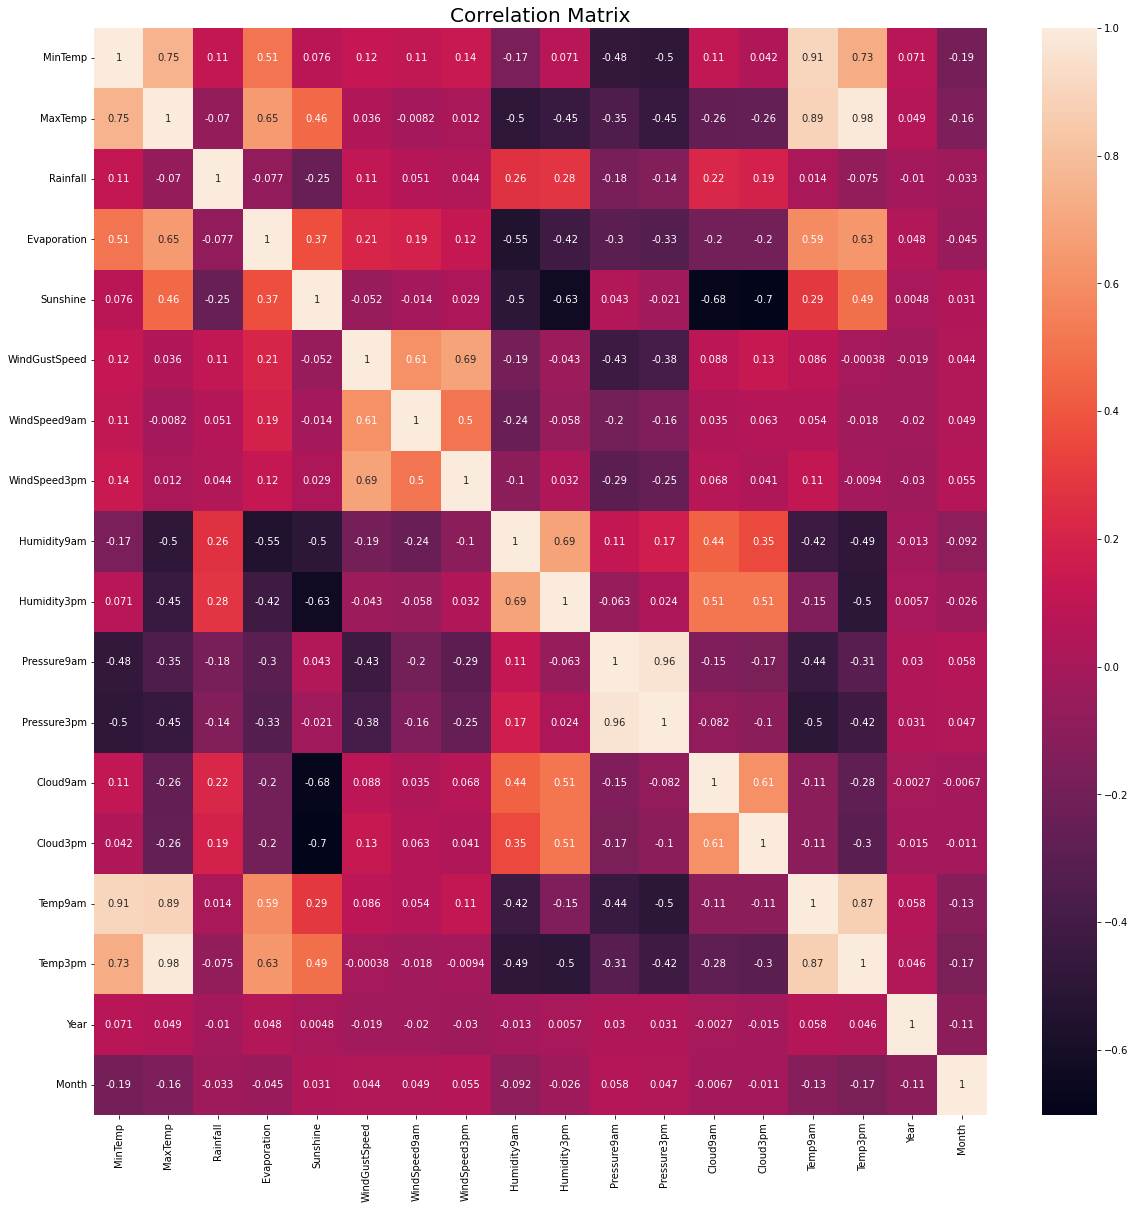

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix', size =20)

Di sini, jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [44]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\adjie\AppData\Local\Temp/ipykernel_19820/1624107534.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [45]:
to_drop_hicorr

['MaxTemp', 'Pressure3pm', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [46]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

In [47]:
data = data.reset_index()
data = data.drop(columns ='index')

In [48]:
data

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,RainToday,RainTomorrow,Year,Month
0,Cobar,17.9,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,2.0,No,No,2009,1
1,Cobar,18.4,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1.0,No,No,2009,1
2,Cobar,19.4,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1.0,No,No,2009,1
3,Cobar,21.9,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1.0,No,No,2009,1
4,Cobar,24.2,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1.0,No,No,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,Darwin,19.3,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,0.0,No,No,2017,6
56416,Darwin,21.2,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,7.0,No,No,2017,6
56417,Darwin,20.7,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,0.0,No,No,2017,6
56418,Darwin,19.5,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1.0,No,No,2017,6


### 6.2 Mengubah data menjadi numerik

In [49]:
le = preprocessing.LabelEncoder()

In [50]:
data[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']] = data[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].apply(le.fit_transform)

In [51]:
data

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,RainToday,RainTomorrow,Year,Month
0,4,17.9,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,2.0,0,0,2009,1
1,4,18.4,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1.0,0,0,2009,1
2,4,19.4,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1.0,0,0,2009,1
3,4,21.9,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1.0,0,0,2009,1
4,4,24.2,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1.0,0,0,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,6,19.3,0.0,6.0,11.0,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,0.0,0,0,2017,6
56416,6,21.2,0.0,7.6,8.6,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,7.0,0,0,2017,6
56417,6,20.7,0.0,5.6,11.0,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,0.0,0,0,2017,6
56418,6,19.5,0.0,6.2,10.6,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1.0,0,0,2017,6


### 6.3 Membuat split data test dan train

In [52]:
x = data.drop(['RainTomorrow'], axis=1)
y = data['RainTomorrow']

print(x)
print(y)

       Location  MinTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0             4     17.9       0.0         12.0      12.3           11   
1             4     18.4       0.0         14.8      13.0            8   
2             4     19.4       0.0         10.8      10.6            5   
3             4     21.9       0.0         11.4      12.2           14   
4             4     24.2       0.0         11.2       8.4           14   
...         ...      ...       ...          ...       ...          ...   
56415         6     19.3       0.0          6.0      11.0            1   
56416         6     21.2       0.0          7.6       8.6            0   
56417         6     20.7       0.0          5.6      11.0            0   
56418         6     19.5       0.0          6.2      10.6            2   
56419         6     20.2       0.0          5.6      10.7            1   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0               48.0           1   

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

## 7. Pendefinisian Model

### 7.1 Logistic Regression

In [54]:
LR = LogisticRegression(solver='liblinear', 
                        C=0.05, 
                        multi_class='ovr', 
                        random_state=0)
LR.fit(x_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [55]:
x_test=scaler.transform(x_test)

In [56]:
lr_pred = LR.predict(x_test)

In [57]:
print('Score train:',LR.score(x_train, y_train))

Score train: 0.8496322226160936


In [58]:
print('Score test:',LR.score(x_test, y_test))

Score test: 0.8541297412265154


Sebelum menetapkan model Logistic Regression, kita akan mengecek kembali fitur mana yang memiliki nilai terbaik pada model ini

In [59]:
importance=LR.coef_[0]
sorted_index=np.argsort(importance)
labels=x.columns[sorted_index]
data_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
data_importance=data_importance.sort_values(by=['Feature Importance'], ascending=False)
data_importance

,Feature Name,Feature Importance
17,Humidity3pm,1.008339
16,WindGustSpeed,0.778532
15,RainToday,0.129537
14,MinTemp,0.101467
13,Month,0.096531
12,Rainfall,0.077060
11,WindGustDir,0.050797
10,Humidity9am,0.018658
9,Year,0.014055
8,Evaporation,-0.041299


Dengan hasil data diatas, bahwa Humidity, WindGustSpeed, RainToday, dan MinTemp memiliki nilai hasil yang terbaik. Dengan demikian, sebagian Feature yang memiliki nilai kurang baik akan dibuang

In [60]:
data_predLR = data.drop(['Month',
                       'Rainfall',
                       'WindGustDir',
                       'Humidity9am',
                       'Year',
                       'Evaporation',
                       'Location',
                       'Cloud9am',
                       'WindDir3pm',
                       'WindDir9am',
                       'WindSpeed9am',
                       'WindSpeed3pm',
                       'Pressure9am',
                       'Sunshine'], axis=1)

In [61]:
data_predLR

,MinTemp,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,17.9,48.0,13.0,0,0
1,18.4,37.0,8.0,0,0
2,19.4,46.0,22.0,0,0
3,21.9,31.0,22.0,0,0
4,24.2,35.0,15.0,0,0
...,...,...,...,...,...
56415,19.3,35.0,32.0,0,0
56416,21.2,37.0,28.0,0,0
56417,20.7,33.0,23.0,0,0
56418,19.5,26.0,58.0,0,0


In [62]:
x_lr = data_predLR.drop(columns='RainTomorrow')
y_lr = data_predLR['RainTomorrow']

x_trainLR, x_testLR, y_trainLR, y_testLR = train_test_split(x_lr, y_lr, test_size=0.2, random_state=0)

In [63]:
scaler = StandardScaler()
x_testLR = scaler.fit_transform(x_testLR)
x_trainLR = scaler.fit_transform(x_trainLR)

In [64]:
LR = LogisticRegression(solver='liblinear', 
                        C=0.05, 
                        multi_class='ovr', 
                        random_state=0)
LR.fit(x_trainLR,y_trainLR)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [65]:
print('Score train:',LR.score(x_trainLR, y_trainLR))
print('Score test:',LR.score(x_testLR, y_testLR))

Score train: 0.8433179723502304
Score test: 0.847660404112017


In [66]:
lr_pred = LR.predict(x_testLR)

### 7.2 SVM

In [67]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(x_train,y_train)

SVC(kernel='linear')

In [68]:
svc_pred = SVM_model.predict(x_test)

In [69]:
importance=SVM_model.coef_[0]
sorted_index=np.argsort(importance)
labels=x.columns[sorted_index]
data_importance=pd.DataFrame({'Feature Name': labels,
                          'Feature Importance' : importance[sorted_index]})
data_importance=data_importance.sort_values(by=['Feature Importance'], ascending=False)
data_importance

,Feature Name,Feature Importance
17,Humidity3pm,0.734066
16,WindGustSpeed,0.531537
15,Rainfall,0.080401
14,RainToday,0.078133
13,Evaporation,0.052502
12,Month,0.050715
11,WindGustDir,0.003625
10,MinTemp,0.001272
9,Year,-0.003047
8,Humidity9am,-0.004988


Untuk hasil ini menerangkan bahwa untuk model SVM, data yang memiliki nilai terbaik yaitu Humidity3pm, WindGustSpeed, Rainfall dan RainToday. Sehingga selain data yang disebutkan akan dihapus

In [70]:
data_predSVC = data.drop(['Month',
                       'Rainfall',
                       'WindGustDir',
                       'Humidity9am',
                       'Year',
                       'Evaporation',
                       'Location',
                       'Cloud9am',
                       'WindDir3pm',
                       'WindDir9am',
                       'WindSpeed9am',
                       'WindSpeed3pm',
                       'Pressure9am',
                       'Sunshine'], axis=1)

In [71]:
data_predSVC

,MinTemp,WindGustSpeed,Humidity3pm,RainToday,RainTomorrow
0,17.9,48.0,13.0,0,0
1,18.4,37.0,8.0,0,0
2,19.4,46.0,22.0,0,0
3,21.9,31.0,22.0,0,0
4,24.2,35.0,15.0,0,0
...,...,...,...,...,...
56415,19.3,35.0,32.0,0,0
56416,21.2,37.0,28.0,0,0
56417,20.7,33.0,23.0,0,0
56418,19.5,26.0,58.0,0,0


In [72]:
x_svc = data_predSVC.drop(columns='RainTomorrow')
y_svc = data_predSVC['RainTomorrow']

x_train_SVC, x_test_SVC, y_train_SVC, y_test_SVC = train_test_split(x_svc, y_svc, test_size=0.2, random_state=0)

In [73]:
scaler = StandardScaler()
x_test_SVC = scaler.fit_transform(x_test_SVC)
x_train_SVC = scaler.fit_transform(x_train_SVC)

In [74]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(x_train_SVC, y_train_SVC)

SVC(kernel='linear')

In [75]:
print('Train score:', SVM_model.score(x_train_SVC, y_train_SVC))
print('Test score:', SVM_model.score(x_test_SVC, y_test_SVC))

Train score: 0.8428970223325062
Test score: 0.8475717830556541


In [76]:
svc_pred = SVM_model.predict(x_test_SVC)

## 8. Evaluasi Model

### 8.1 Logistic Regression

In [77]:
print(classification_report(y_testLR, lr_pred))
print('Accuracy Score:', accuracy_score(y_testLR, lr_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8854
           1       0.72      0.48      0.57      2430

    accuracy                           0.85     11284
   macro avg       0.79      0.71      0.74     11284
weighted avg       0.84      0.85      0.84     11284

Accuracy Score: 0.847660404112017


### 8.2 SVM

In [78]:
print(classification_report(y_test_SVC, svc_pred))
print('Accuracy Score:', accuracy_score(y_test_SVC, svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8854
           1       0.75      0.44      0.56      2430

    accuracy                           0.85     11284
   macro avg       0.80      0.70      0.73     11284
weighted avg       0.84      0.85      0.83     11284

Accuracy Score: 0.8475717830556541


# 9. Model Inference

In [79]:
Temperature = float(input('Temperatur udara saat ini:'))
WindSpeed = float(input('Kecepatan angin saat ini:'))
Humidity = float(input('Kelembapan udara saat ini'))
Rain = input('Apakah hari ini hujan?(yes/no)')
input =[Temperature, WindSpeed, Humidity]
if Rain == 'yes':
    input.append(1)
elif Rain == 'no':
    input.append(0)

Temperatur udara saat ini:30
Kecepatan angin saat ini:21
Kelembapan udara saat ini24
Apakah hari ini hujan?(yes/no)yes


In [80]:
predicted = LR.predict([input])

if predicted == 1:
    prediction='Akan hujan'
elif predicted == 2:
    prediction='Tidak akan hujan'

print('Besok akan diprediksi', prediction)

Besok akan diprediksi Akan hujan


## 10. Kesimpulan

Berdasarkan analisis diatas dapat ditarik kesimpulan:
1. Dataset Rain in Australia dapat dijadikan sebagai data untuk memprediksi hujan
2. Tiap bulan memiliki curah hujan yang berbeda
3. Kecepatan Angin biasanya akan menurun pada bulan ke enam dan akan meningkat kembali hingga bulan ke dua belas
4. Cairns merupakan wilayah yang memiliki curah hujan yang tinggi sedangkan Woomera hanya memiliki curah hujan yang rendah
5. SVM dan Logistic Regression memiliki nilai akurasi yang sama namun Logistic Regression lebih cepat proses trainingnya daripada SVM